# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
df = pd.read_csv('data/human_body_temperature.csv')

In [16]:
def ecdf(data):
    """Compute ECDF for a one dimensional array of measurements"""
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,n+1)/n
    return x,y

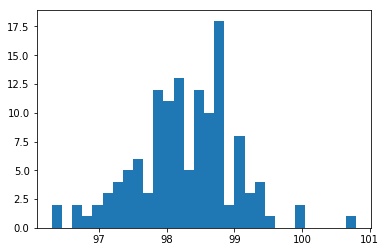

In [9]:
plt.hist(df['temperature'],bins=30)
plt.show()

In [13]:
temp=np.array(df['temperature'])
temp_mean=np.mean(temp)
temp_stdv=np.std(temp)

In [15]:
norm_temp=np.random.normal(temp_mean,temp_stdv,size=1000)

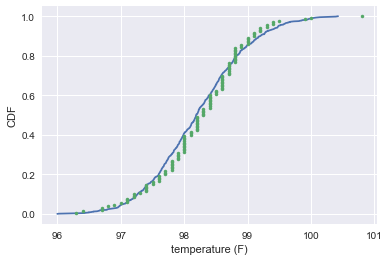

In [19]:
temp_x,temp_y=ecdf(temp)
norm_temp_x,norm_temp_y=ecdf(norm_temp)
sns.set()
_=plt.plot(norm_temp_x,norm_temp_y)
_=plt.plot(temp_x,temp_y,marker='.',linestyle='none')
_=plt.xlabel('temperature (F)')
_=plt.ylabel('CDF')
plt.show()

In [21]:
print("Answer of Question 1: The distribution of body temperature is normal distribution ")

Answer of Question 1: The distribution of body temperature is normal distribution 


In [25]:
print("Answer of Question 2: Since the number of observations is "+str(len(temp))+" which is greater than 30 according to CLT. So the sample size is large enough to be condiser as normal distribution.")

Answer of Question 2: Since the number of observations is 130 which is greater than 30 according to CLT. So the sample size is large enough to be condiser as normal distribution.


In [34]:
def bootstrap_replicate_1d(data,func):
    return func(np.random.choice(data,size=len(data)))
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates"""
    bs_replicates=np.empty(size)
    for i in range(size):
        bs_replicates[i]=bootstrap_replicate_1d(data,func)        
    return bs_replicates

In [53]:
temp_mean_theor=98.6
temp_mean_shifted=temp-temp_mean+98.6
bs_replicates_temp=draw_bs_reps(temp_mean_shifted,np.mean,size=100000)
p=np.sum(bs_replicates_temp<=temp_mean)/100000
print('p=',p)

p= 0.0


In [56]:
print("Answer of Question 3.1: The p value is "+str(p)+" which is less than 0.05 so the true population is not 98.6 F")

Answer of Question 3.1: The p value is 0.0 which is less than 0.05 so the true population is not 98.6 F


In [38]:
print("Answer of Question 3.2: Use one sample test because we would like to compare the mean of a sample to a known value")

Answer of Question 3.2: Use one sample test because we would like to compare the mean of a sample to a known value


In [59]:
print("Answer of Question 3.3: In this case, we did not know the vairance of the population so we should use one sample t-test rather than z-test")

Answer of Question 3.3: In this case, we did not know the vairance of the population so we should use one sample t-test rather than z-test


In [57]:
stats.ttest_1samp(temp,98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [60]:
print("Answer of Question 3.4: Since we don't know the variance of population so we can not perform z-test")

Answer of Question 3.4: Since we don't know the variance of population so we can not perform z-test


In [92]:
np.random.seed(6)
temp_random=np.random.choice(temp,10,replace=False)

In [93]:
stats.ttest_1samp(temp_random,98.6)

Ttest_1sampResult(statistic=-1.7251638983558908, pvalue=0.11858145125072761)

In [94]:
SEM=temp_stdv/np.sqrt(10)
Z_score=(np.mean(temp_random)-temp_mean_theor)/SEM

In [95]:
Z_score

-2.164882576392428

In [96]:
z_test_p=stats.norm.sf(abs(Z_score))

In [97]:
print("Answer of Question 4: Since we know the variance of population so z_test is better to use. The p value of z test is more accurate so which means if we know the variance of population we should use z test otherwise t test.")

Answer of Question 4: Since we know the variance of population so z_test is better to use. The p value of z test is more accurate so which means if we know the variance of population we should use z test otherwise t test.


In [98]:
bs_replicates_temp_noshift=draw_bs_reps(temp,np.mean,size=1000)
conf_int_temp=np.percentile(bs_replicates_temp_noshift,[2.5,97.5])

In [99]:
conf_int_temp

array([ 98.12153846,  98.36542308])

In [100]:
def mean_conf_int(data,confidence=0.95):
    n=len(data)
    m,se=np.mean(data),scipy.stats.sem(data)
    h=se*stats.t._ppf((1+confidence)/2.,n-1)
    return m,m-h,m+h


In [101]:
mean_conf_int(temp,confidence=0.95)

(98.249230769230749, 98.122002905608014, 98.376458632853485)

In [103]:
z_critical=stats.norm.ppf(q=0.975)
margin_of_error=z_critical*(temp_stdv/np.sqrt(len(temp)))

In [104]:
margin_of_error

0.12554865777413818

In [117]:
temp_males=np.array(df.loc[df['gender']=='M']['temperature'])
temp_females=np.array(df.loc[df['gender']=='F']['temperature'])

In [120]:
temp_males_mean_shifted=temp_males-np.mean(temp_males)+temp_mean
temp_females_mean_shifted=temp_females-np.mean(temp_females)+temp_mean
empirical_diff_means=np.mean(temp_females)-np.mean(temp_males)

In [121]:
bs_replicates_males=draw_bs_reps(temp_males_mean_shifted,np.mean,size=1000)
bs_replicates_females=draw_bs_reps(temp_females_mean_shifted,np.mean,size=1000)
bs_replicates_gender=bs_replicates_females-bs_replicates_males
p_gender=np.sum(bs_replicates_gender>=empirical_diff_means)/len(bs_replicates_gender)

In [122]:
p_gender

0.014

In [ ]:
print("Answer of Question 6: I will use two samples bootstrap hypothesis testing to compare different means, the p value is smaller than 0.05 which means the temperature between male and female are significantly different.")